The task is to predict if an individual's annual income excceds $50,000 based on census data. This dataset contains information such as education level, relationship status, race, etc. about a person and our aim is to try to classify the income level of this person as ">50k" or "<=50k". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ghaza\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.describe().T

count           mean            std      min       25%  \
age              48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt           48842.0  189664.134597  105604.025423  12285.0  117550.5   
educational-num  48842.0      10.078089       2.570973      1.0       9.0   
capital-gain     48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss     48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week   48842.0      40.422382      12.391444      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178144.5  237642.0  1490400.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [6]:
object_columns = list(data.select_dtypes(include='object').columns)
numerical_columns = list(data.select_dtypes(include='int64').columns)

In [7]:
for col in object_columns:
    print(data[col].value_counts())
    print('\n')

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial

Notice that some values are '?' so we will consider them as missing values, and will consider it a separate category named "Unknown".

In [8]:
data.replace('?', 'unknown', inplace=True)

Droping the duplicates, if any.

In [9]:
duplicates = data.duplicated()
# Check if there are any duplicates,
if duplicates.any():
    data.drop_duplicates()

Below, we will manipulate some of our data.

In [10]:
data.education = data.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
data.education = data.education.replace('HS-grad','High School')
data.education = data.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Associate-Education')
data['marital-status'] = data['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
data['marital-status'] = data['marital-status'].replace(['Never-married'],'Unmarried')
data['marital-status'] = data['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Separated')
data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})

C:\Users\ghaza\AppData\Local\Temp\ipykernel_1696\950606339.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})


   **Data Visualization and EDA**

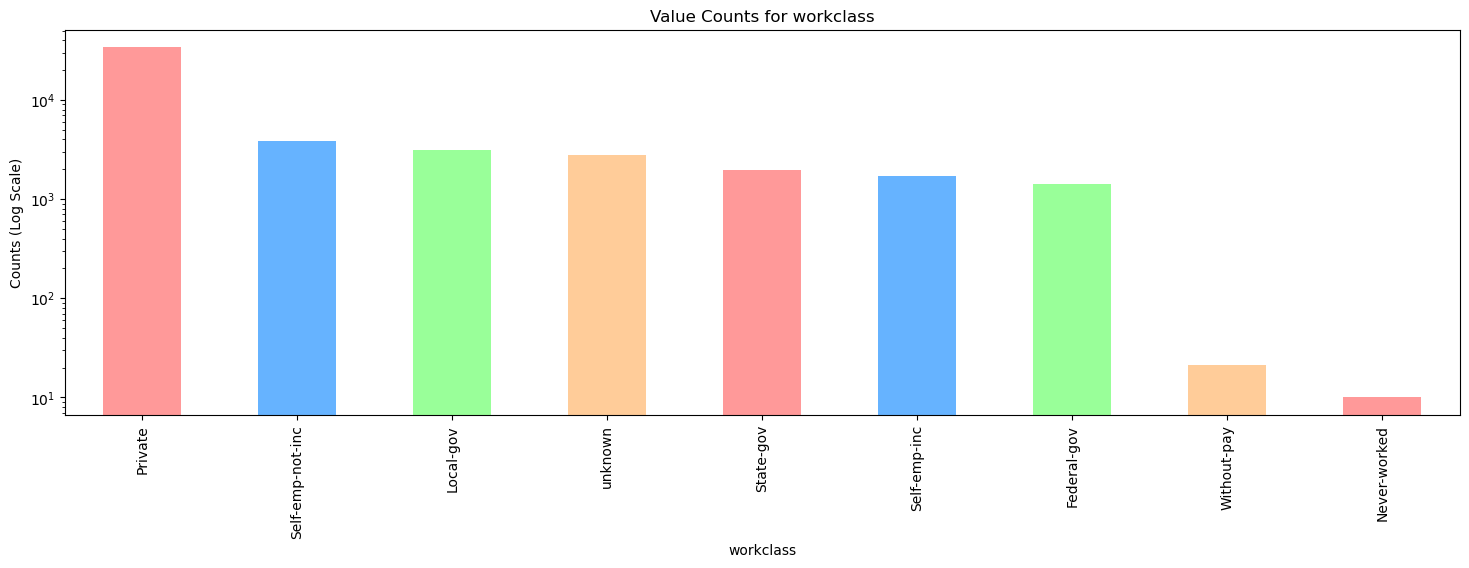

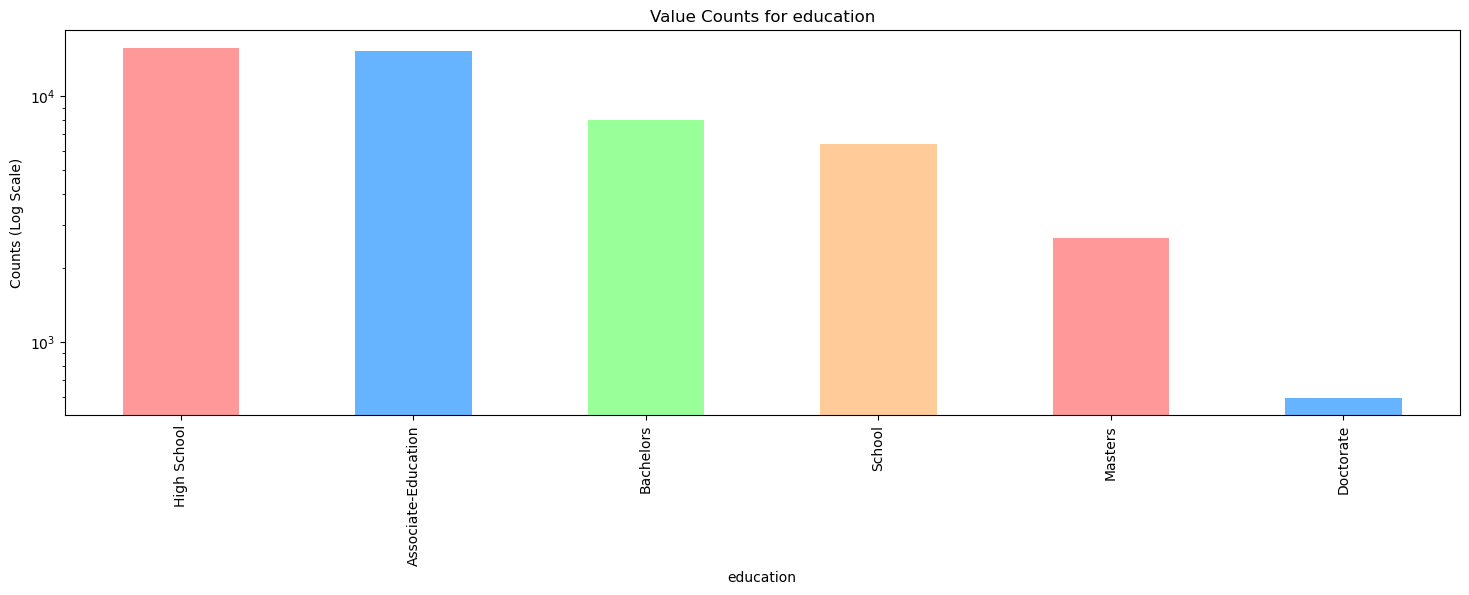

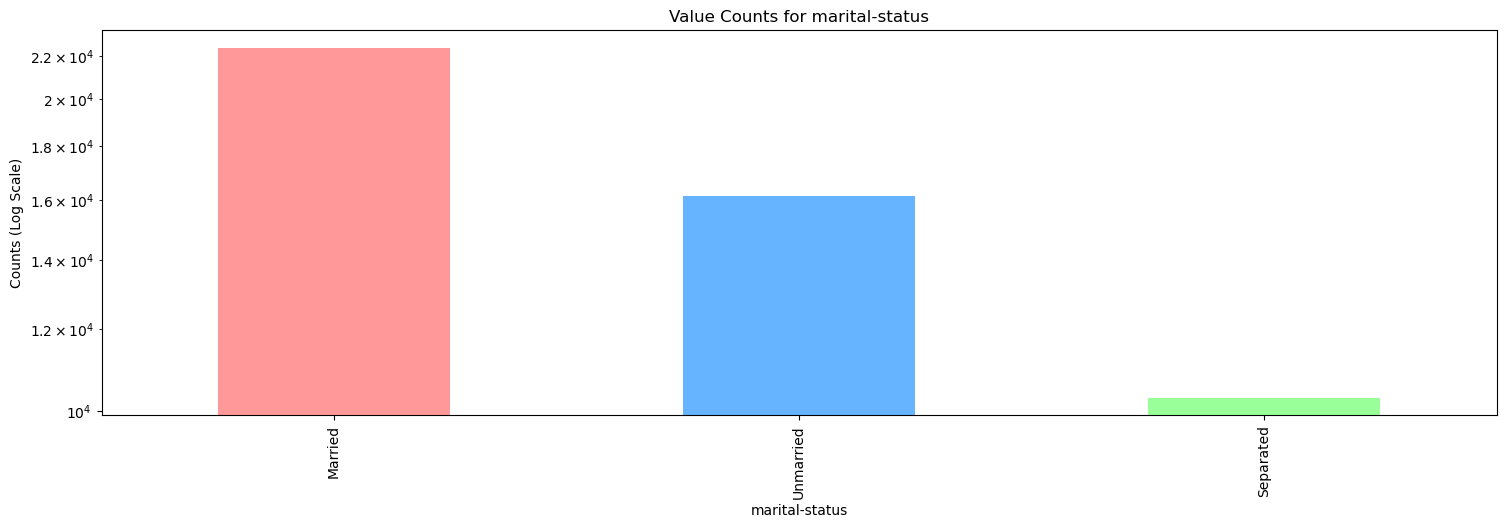

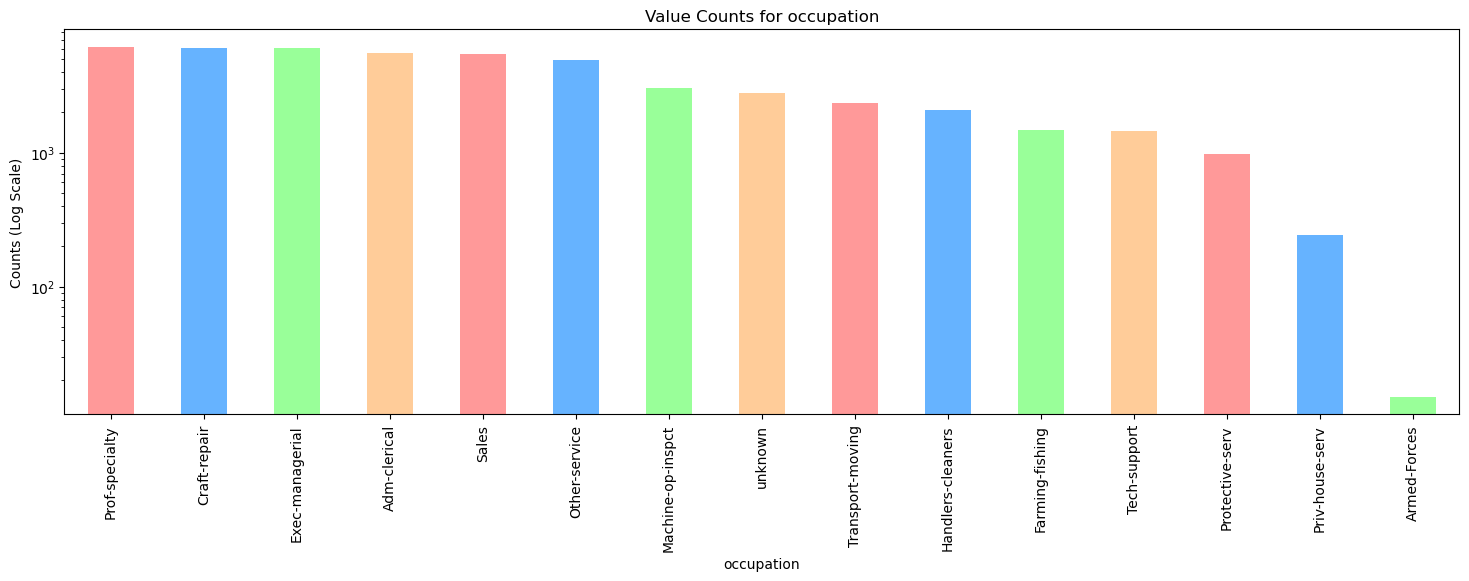

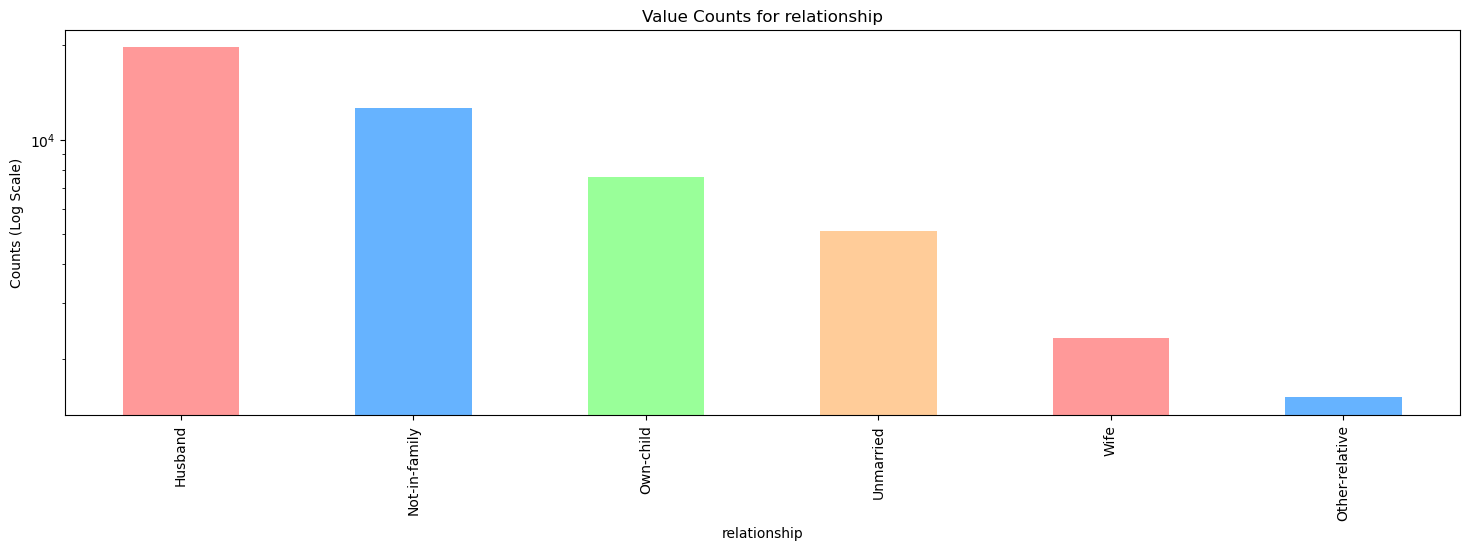

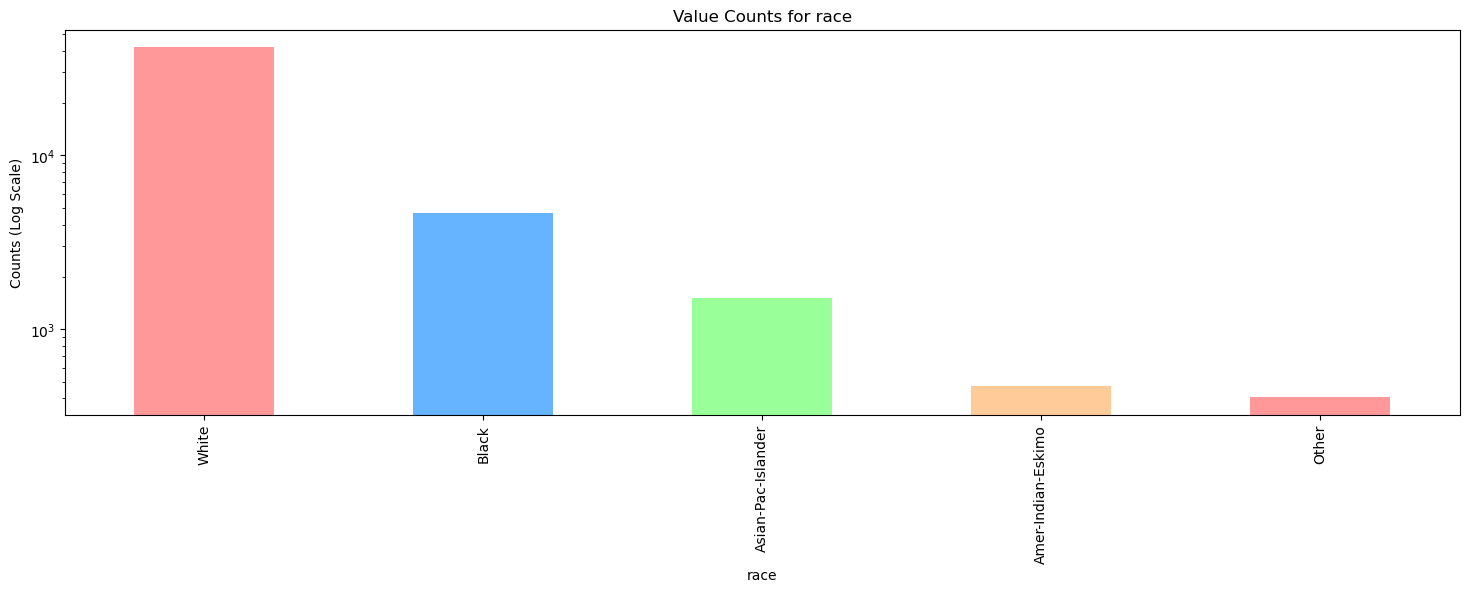

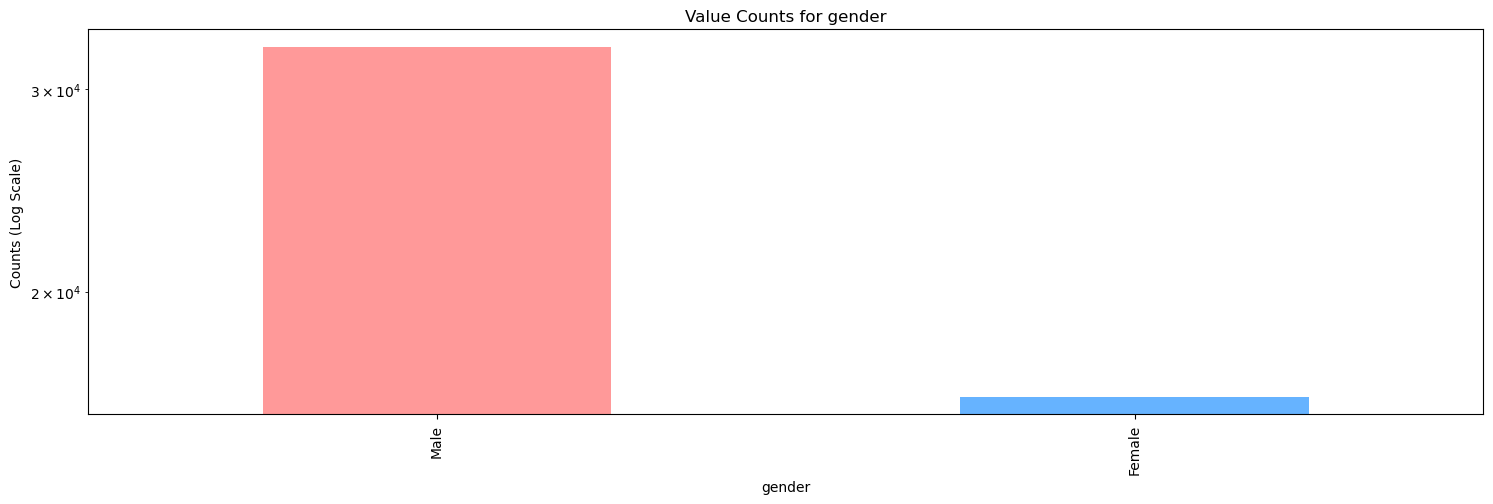

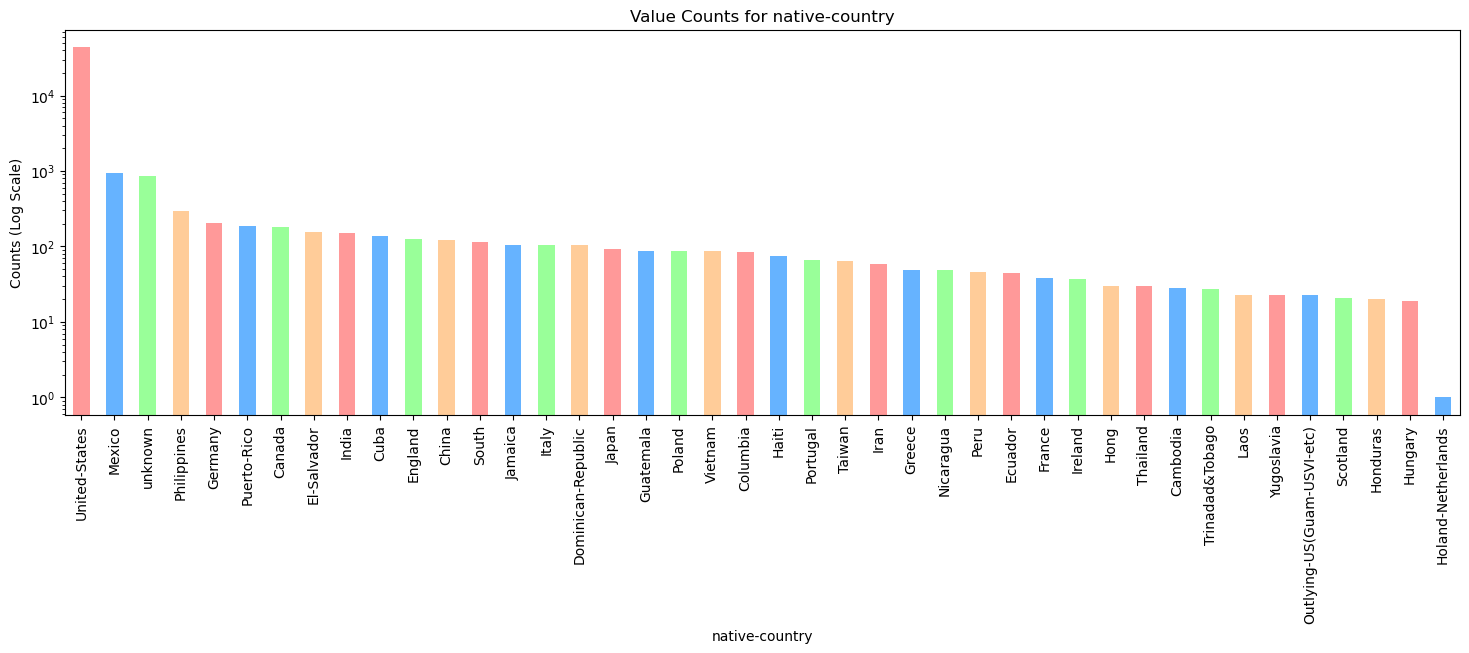

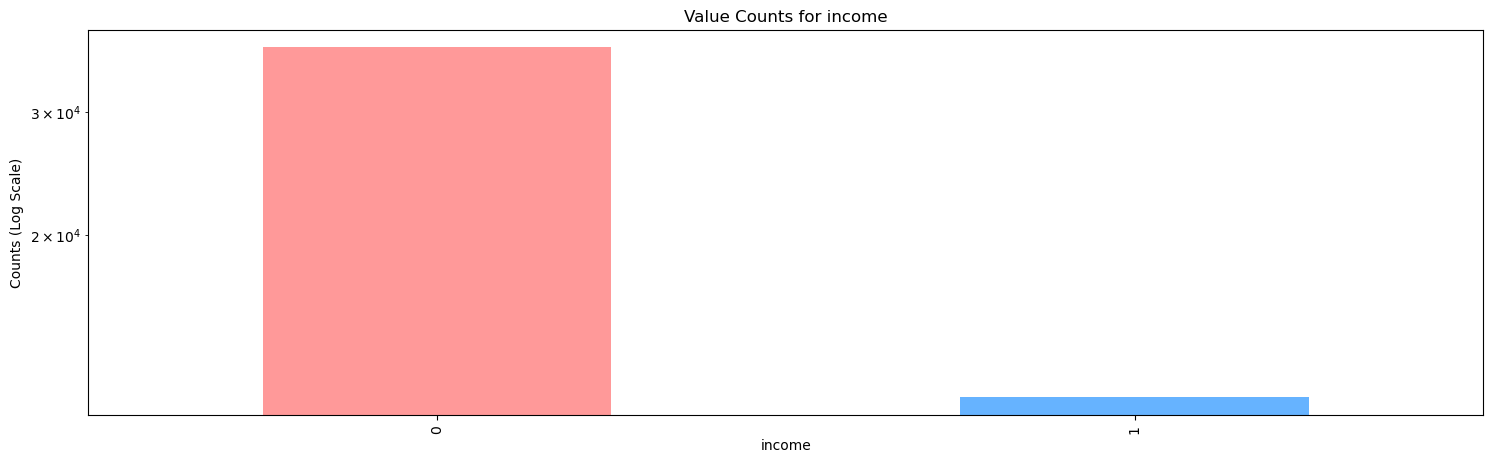

In [11]:
for col in object_columns:
    value_counts = data[col].value_counts()
    plt.figure(figsize=(18,5))
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    value_counts.plot(kind='bar', color=colors)
    plt.title(f'Value Counts for {col}')
    plt.ylabel('Counts (Log Scale)')
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.show()

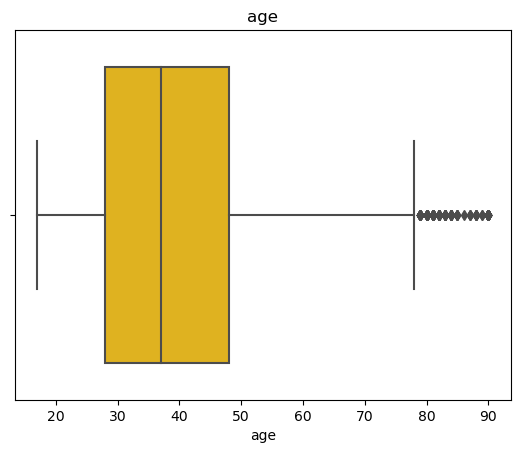

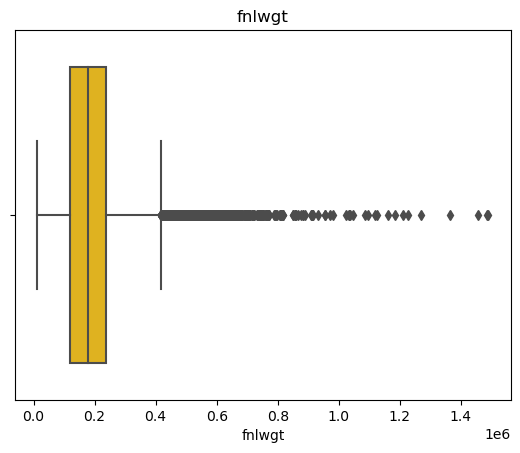

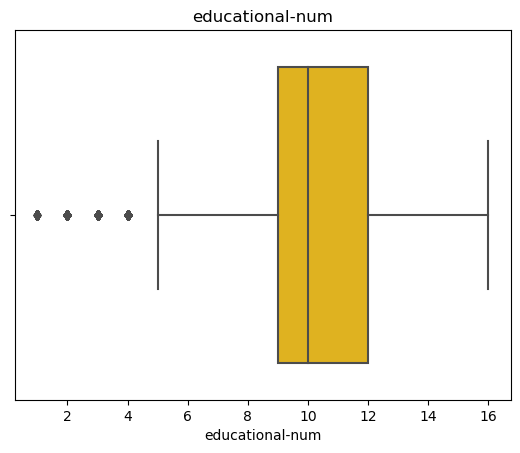

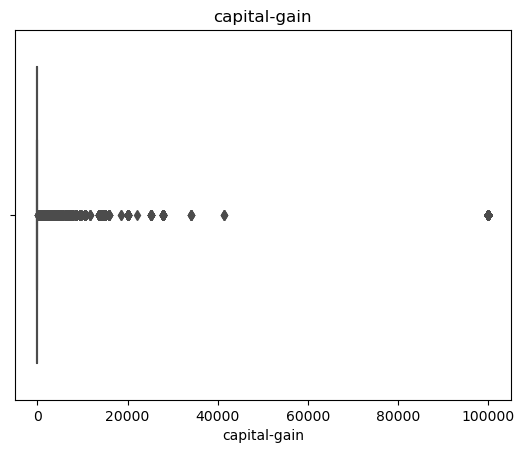

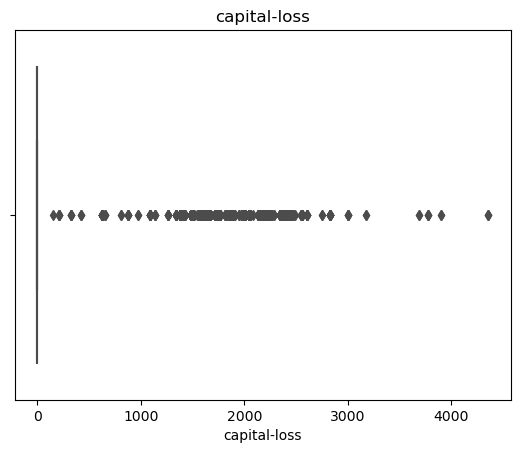

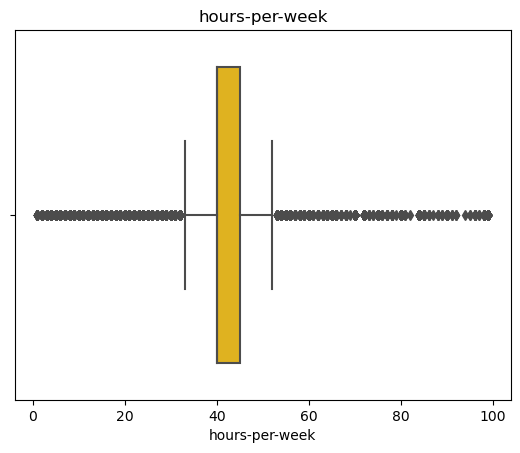

In [12]:
for col in numerical_columns:
    sns.boxplot(x=data[col], color = '#FFC300')
    plt.title(str(col))
    plt.show()

In [13]:
data['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

In [14]:
data['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: count, Length: 99, dtype: int64

Much of the data in the 'capital gain' and 'capital loss' columns appears unreliable or potentially missing, with most values being 0 or unusual figures like 99999. This could stem from issues with data entry. Below, I will subtract the 'capital loss' from 'capital gain' to focus solely on the resulting sentiment, essentially determining whether the net capital outcome is positive or negative after accounting for the gain and loss.

In [15]:
data['capital-sentiment'] = data['capital-gain'] - data['capital-loss']
data['capital-sentiment'].value_counts()

capital-sentiment
 0        42525
 15024      513
 7688       410
 7298       364
-1902       304
          ...  
-1421         1
 6612         1
-1539         1
 22040        1
 2387         1
Name: count, Length: 221, dtype: int64

In [16]:
data['capital-sentiment'] = np.where(data['capital-sentiment'] > 0, 1, -1)

In [17]:
data.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

Below, we will use IQR to remove outliers.

In [18]:
for col in ['age','educational-num', 'hours-per-week']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    data.drop(outliers.index, inplace=True)

In [19]:
# Calculate correlations for numeric features
correlations = {}
for col in numerical_columns:
    if col in data.columns:
        correlations[col] = data['income'].corr(data[col])

In [20]:
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with Income'])
print(correlation_df.sort_values(by='Correlation with Income', ascending=False))

           Feature  Correlation with Income
2  educational-num                 0.328754
0              age                 0.262902
3   hours-per-week                 0.196484
1           fnlwgt                -0.002255


Seems (fnlwgt) has not much of correlation with target value(income), so I'm going to drop this column.

In [21]:
data.drop('fnlwgt', axis=1, inplace=True)

In [22]:
correlations = {}
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables and calculate point biserial correlation
label_encoder = LabelEncoder()
for col in object_columns:
    # Transform the categorical data to numeric
    encoded = label_encoder.fit_transform(data[col])
    correlation = pointbiserialr(data['income'], encoded)[0]  # [0] to just get the correlation coefficient
    correlations[col] = correlation

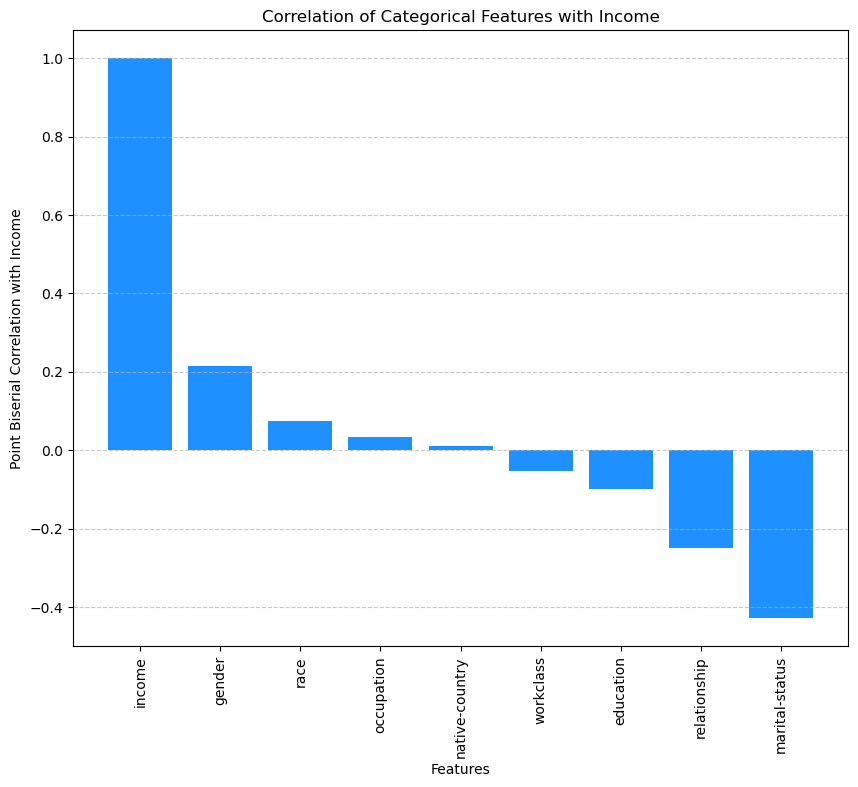

In [23]:
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
# Sorting the DataFrame by correlation values for better visualization
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(correlation_df['Feature'], correlation_df['Correlation'], color='dodgerblue')
plt.xlabel('Features')
plt.ylabel('Point Biserial Correlation with Income')
plt.title('Correlation of Categorical Features with Income')
plt.xticks(rotation=90)  # Rotate the feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better alignment
plt.show()

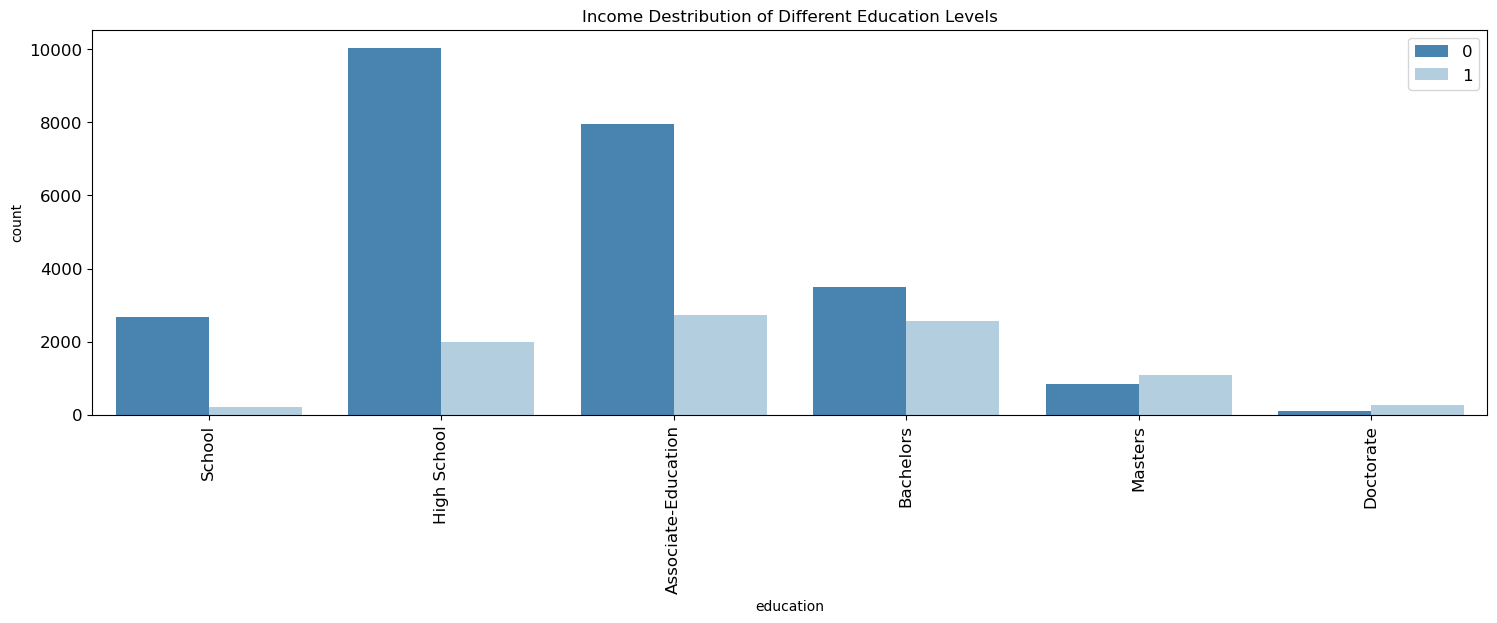

In [24]:
plt.figure(figsize= (18, 5))
plt.title('Income Destribution of Different Education Levels')

sns.countplot(x = data['education'], hue= data['income'], data = data, palette='Blues_r')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

* There is a significant number of individuals with a high school education or lower whose income is below $50,000.  

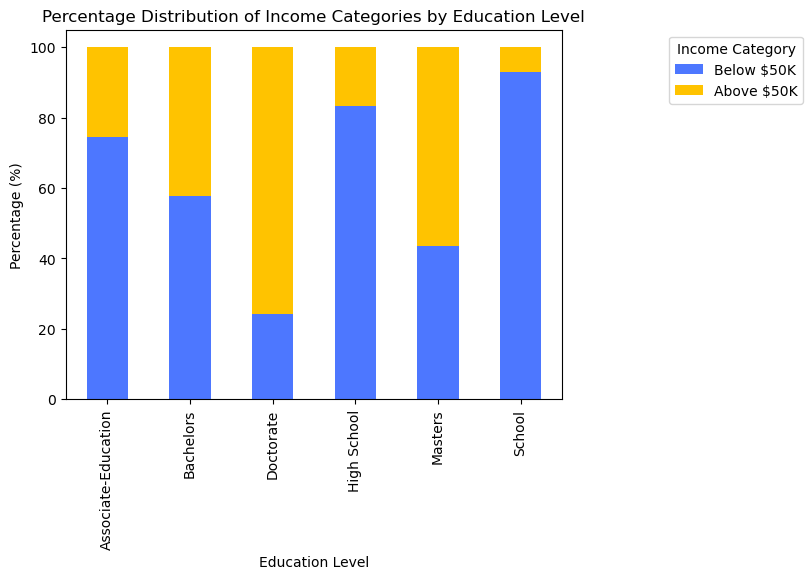

In [25]:
# Calculating the percentage of each income category (0 and 1) within each education level
percentage_df = data.groupby('education')['income'].value_counts(normalize=True).mul(100).unstack()

# Plotting the results
ax = percentage_df.plot(kind='bar', stacked=True, color=['#4D77FF', '#FFC300'])
plt.title('Percentage Distribution of Income Categories by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Income Category', labels=['Below $50K', 'Above $50K'])
ax.legend(title='Income Category', labels=['Below $50K', 'Above $50K'], loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

* Individuals with master’s and doctoral degrees predominantly earn above $50,000, contrasting with lower education levels where the majority earn below this threshold.

In [26]:
gender_group = data.groupby(['gender', 'income']).size().reset_index(name='count')
gender_group

gender  income  count
0  Female       0   9398
1  Female       1   1312
2    Male       0  15728
3    Male       1   7562

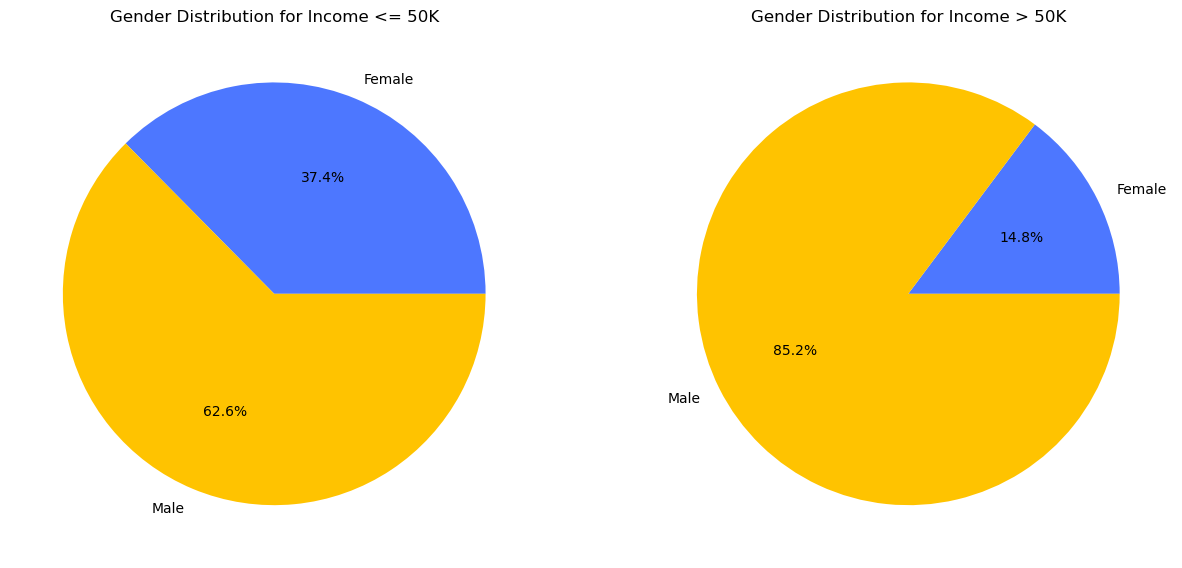

In [27]:
income_below_50k = gender_group[gender_group['income'] == 0]
income_above_50k = gender_group[gender_group['income'] == 1]

figure, axs = plt.subplots(1, 2, figsize= (15, 10))

axs[0].pie(income_below_50k['count'], labels=income_below_50k['gender'], autopct='%1.1f%%', startangle=0, colors = ['#4D77FF', '#FFC300'])
axs[0].set_title('Gender Distribution for Income <= 50K')

axs[1].pie(income_above_50k['count'], labels=income_above_50k['gender'], autopct='%1.1f%%', startangle=0, colors =  ['#4D77FF', '#FFC300'])
axs[1].set_title('Gender Distribution for Income > 50K')

plt.show()

* In both scenarios, women overall earn less than men.
* Income >50K: Males are significantly more likely to earn higher incomes.

<Axes: xlabel='income', ylabel='count'>

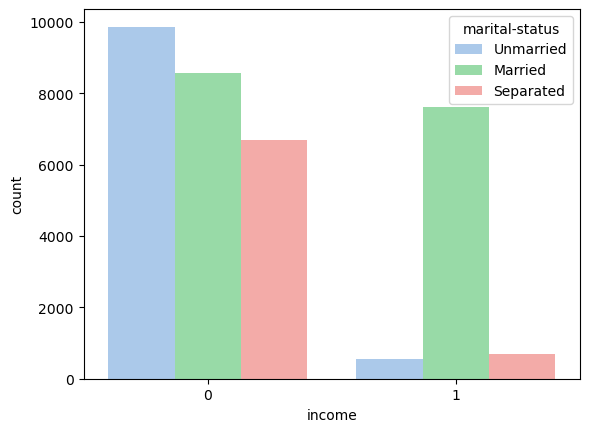

In [28]:
sns.countplot(x=data['income'],palette='pastel6',hue='marital-status',data=data)

* Marital status might be a factor influencing income levels, with married individuals generally achieving higher incomes. This could be due to a variety of socio-economic factors, including dual incomes or more stable living conditions.  

* There are lower numbers of unmarried and seperated indivisuals who make above 50k in comparison to married couples who make above 50k.  
* However, it does not seem being married has much correlation with predicting the income status. We can test that by forming the hypothesis below:

### Null Hypothesis (H0):  

"There is no significant difference in the proportion of married individuals earning above 50k compared to those earning below $50k."

### Alternative Hypothesis (H1):
"There is a significant difference in the proportion of married individuals earning above 50k compared to those earning below $50k."  

This structuring allows for a clear statistical test (like the chi-squared test for independence) to either reject the null hypothesis and accept the alternative or fail to reject the null, suggesting that being married does not significantly affect whether individuals earn more or less than $50,000.

<Axes: xlabel='income', ylabel='count'>

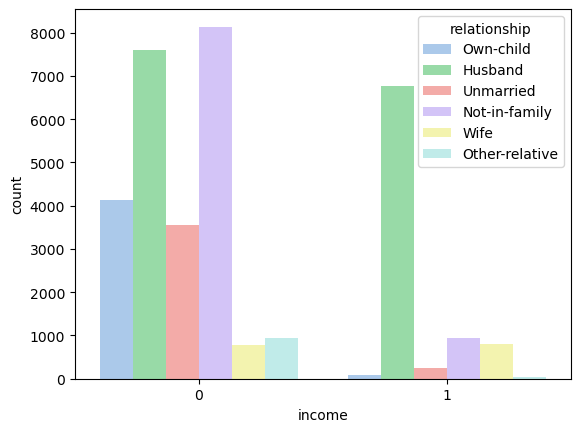

In [29]:
sns.countplot(x=data['income'],palette='pastel6',hue='relationship',data=data)

<Axes: xlabel='race', ylabel='count'>

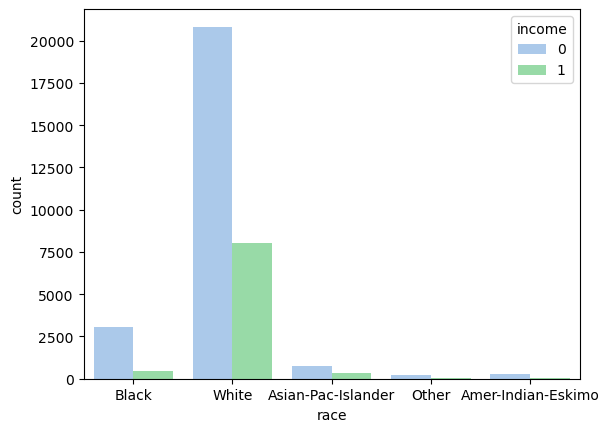

In [30]:
sns.countplot(x=data['race'],hue='income',data=data,palette='pastel6')

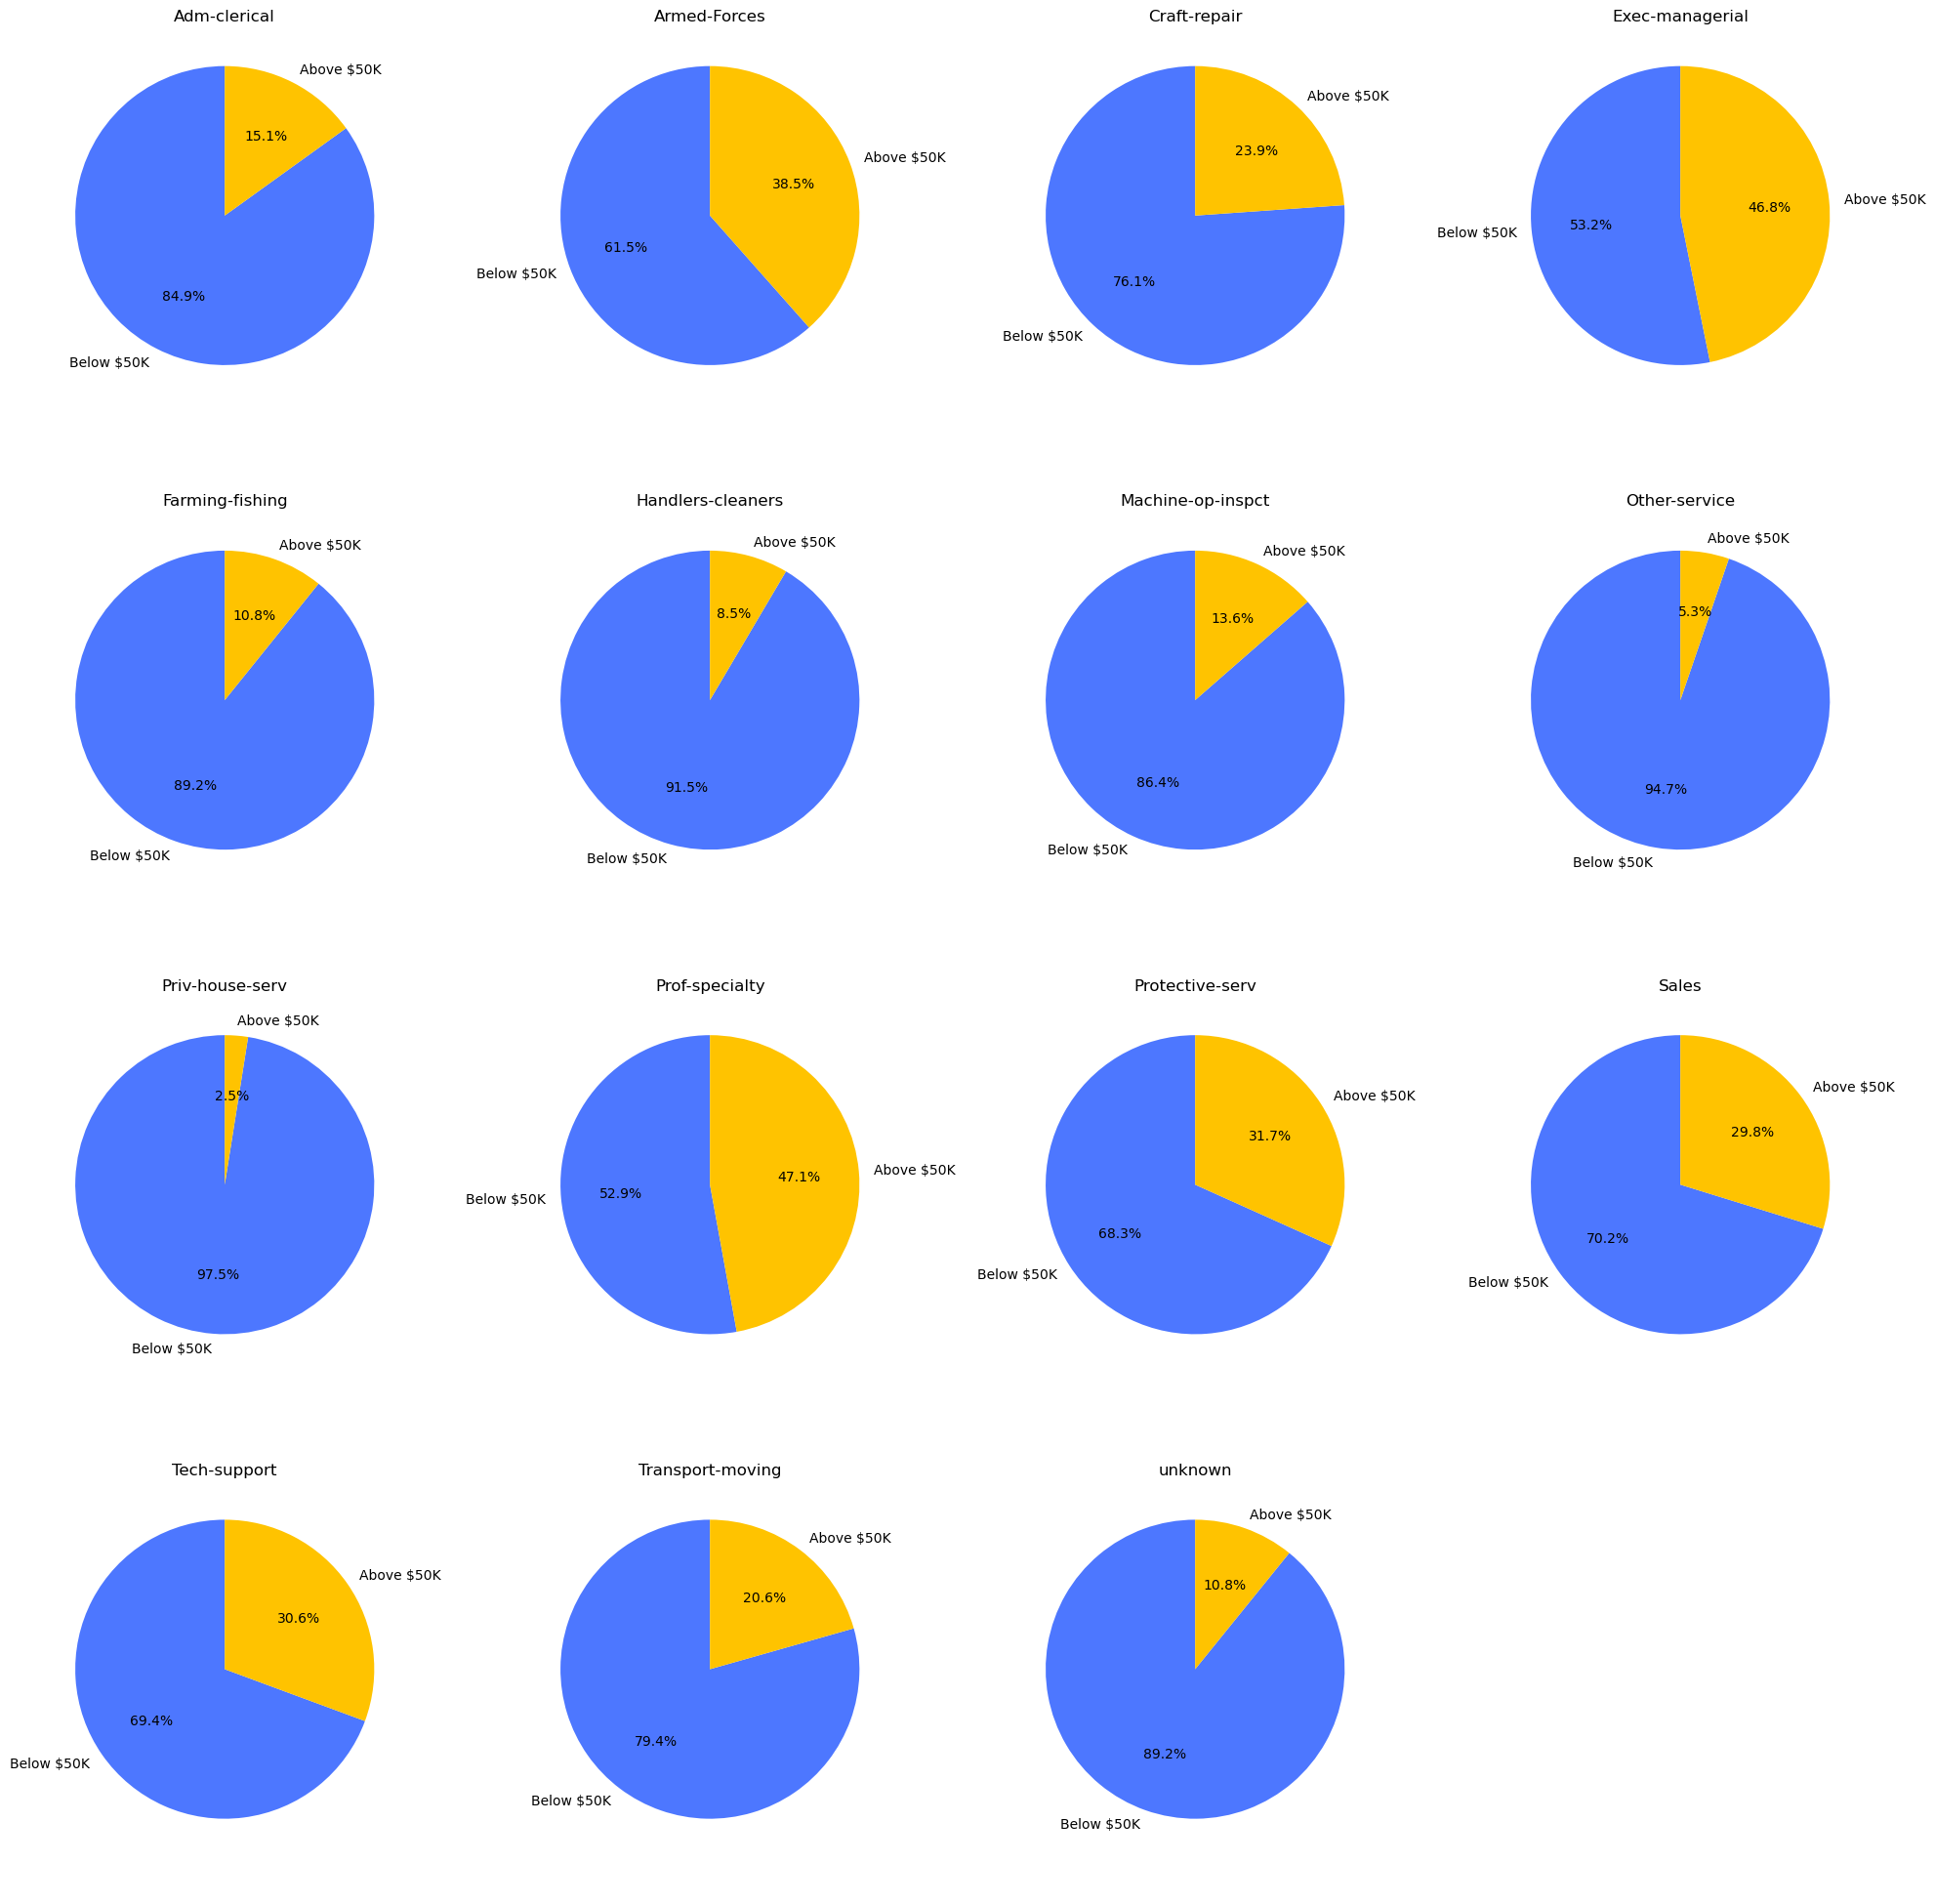

In [31]:
# Group the data by 'occupation' and 'income', and get the size of each group
occupation_counts = data.groupby(['occupation', 'income']).size().unstack(fill_value=0)

# Plotting a pie chart for each occupation showing the income distribution
fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # Adjust the layout size based on the number of categories
axs = axs.flatten()  # Flatten the axis array for easier iteration

for idx, (occupation, counts) in enumerate(occupation_counts.iterrows()):
    axs[idx].pie(counts, labels=['Below $50K', 'Above $50K'], autopct='%1.1f%%', startangle=90, colors=['#4D77FF', '#FFC300'])
    axs[idx].set_title(occupation)

# Hide any unused axes if there are less than 16 occupations
for ax in axs[len(occupation_counts.index):]:
    ax.axis('off')

plt.tight_layout()
plt.show()